# Pymaceuticals Inc.
---

### Analysis

- The analysis of mice in this data set started off with a merging of two sub-datasets. The first was mouse_metadata which had neccessary information needed for most of this analysis including 'Drug Regimen' and 'Weight (g)'. The secondary study_results dataset had info on 'Timepoint' and 'Tumor Volume (mm3)' These two data sets were the combined on 'Mouse ID' to then be the larger one to pull and manipulate.
- The total number of mice was 248, which was found by removing duplicates. The top 3 Drug Regimens were Capomulin (230), Ramicane (228), and Ketapril (188(). The distribution in terms of sex was 51% male and 49% female so there was a fairly even distribution of mice sex.
- There is one case that follwed Mouse l509 who utilized the Drug Regimen Capomulin. The graph outlined Tumor Volume over a range of 45 days. The bar graph seems to indicate that Tumor Volume decreased over the 45 day span of Mouse L509 taking Drug Regiment Capomulin. 
- Our scatter plot shows that there is a strong positive correlation between mouse weight and average tumor volume. The correlation is 0.84 so when can infer that when weight increases the average tumor size also increases.
- The regression line helps us understand that the average tumor volume will change as a result of mice weight changing. 
- Our analysis outlined that Capomulin is best for reduction of tumor size followed by Ramicane.


In [44]:
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [45]:
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [2]:
# Combine the data into a single DataFrame
mouse_df = pd.merge(study_results, mouse_metadata, on = 'Mouse ID')

# Display the data table for preview
mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [3]:
# Checking the number of mice.
Num_mice = mouse_df["Mouse ID"].nunique()
Num_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_entries = mouse_df[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

#print duplicates
dup_entries

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_id = dup_entries["Mouse ID"].iloc[0]

all_duplicate_mouse = mouse_df[mouse_df["Mouse ID"] == duplicate_mouse_id]

all_duplicate_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
#remove duplicate mouse ID "g989"
clean_mouse_df = mouse_df[mouse_df["Mouse ID"] != "g989"]
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [8]:
# Print final clean dataframe

final_mouse_df = clean_mouse_df[(clean_mouse_df["Timepoint"]==0) & (clean_mouse_df["Tumor Volume (mm3)"]==45.0)]
final_mouse_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [9]:
# Checking the number of mice in the clean DataFrame.
Num_mice_clean= clean_mouse_df["Mouse ID"].nunique()
Num_mice_clean

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: mean, median, variance, standard deviation, and SEM of the tumor volume. 
Drug_Reg_mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
Drug_Reg_med = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
Drug_Reg_var = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
Drug_Reg_std = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
Drug_Reg_sem = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


In [11]:
# Assemble the resulting series into a single summary DataFrame.
drug_reg_pd = pd.DataFrame({"Mean Tumor Volume": Drug_Reg_mean,
                           "Median Tumor Volume": Drug_Reg_med,
                           "Tumor Volume Variance": Drug_Reg_var,
                           "Tumor Volume Std. Dev.": Drug_Reg_std,
                           "Tumor Volume Std. Err.": Drug_Reg_sem})

drug_reg_pd


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Drug_Summary = clean_mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
header=[["Tumor Volume (mm3)", "Tumor Volume (mm3)", "Tumor Volume (mm3)", "Tumor Volume (mm3)", "Tumor Volume (mm3)"], ["mean", "median", "var", "std", "sem"]]
Drug_Summary.columns=header
Drug_Summary


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [13]:
Drug_Reg_counts = clean_mouse_df.groupby('Drug Regimen').size()

#sort values
Drug_Reg_counts_sorted = Drug_Reg_counts.sort_values(ascending=False)
Drug_Reg_counts_sorted

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
dtype: int64

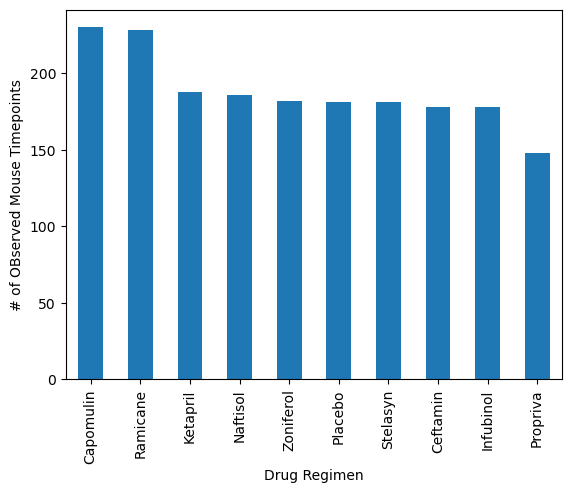

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_Reg_counts_sorted.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of OBserved Mouse Timepoints');


In [15]:
#import Numpy
import numpy as np

In [16]:
#Set X & Y
Num_rows = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = np.arange(len(Num_rows))



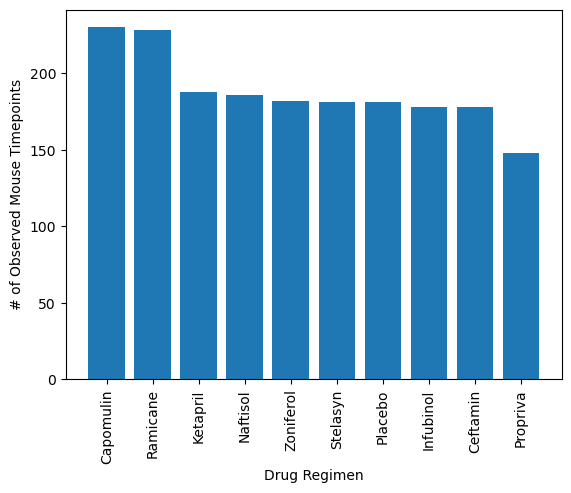

In [17]:
#plot gar chart
plt.bar(x_axis, Num_rows, align='center')

# Define the tick locations for the x-axis
tick_loactions = [value for value in x_axis]

# Set the x-axis labels with rotation for better readability
plt.xticks(tick_loactions, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"], rotation =90)

# Set X & Y axis label
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints");


In [19]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gen = clean_mouse_df.groupby('Sex').size()
mouse_gen_sorted = mouse_gen.sort_values(ascending=False)
mouse_gen_sorted

Sex
Male      958
Female    922
dtype: int64

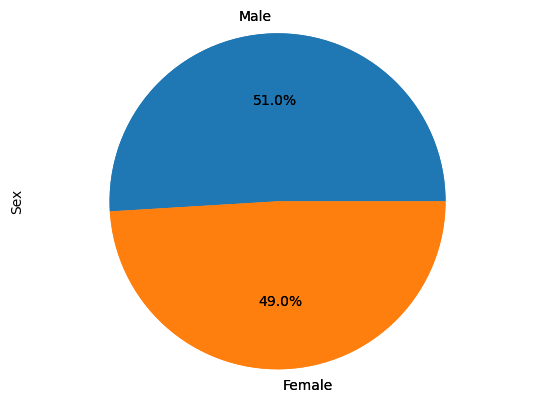

In [43]:
# Plot a pie chart for the distribution of male and female mice
mouse_gen_sorted.plot(kind='pie', autopct='%1.1f%%', startangle=360, ylabel='Sex')

# Set the aspect ratio to be equal for a circular pie chart
plt.axis('equal')

# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=['Male', 'Female']
sizes=[958, 922]

# Plot a pie chart with the given sizes and labels, showing the distribution of sex
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=360)
plt.ylabel('Sex')
plt.axis('equal');

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Timep_mouse = clean_mouse_df.groupby('Mouse ID')['Timepoint'].max().reset_index()



In [23]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df = pd.merge(Timep_mouse, clean_mouse_df, on=['Mouse ID', 'Timepoint'])

# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#filter data frame
Drug_filt_data = merged_mouse_df[merged_mouse_df['Drug Regimen'].isin(treatments)]

In [24]:
#create dictionary for potential outliers
potential_outliers = {}

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    drug_sub = Drug_filt_data[Drug_filt_data['Drug Regimen'] == drug]
    tumor_vols = drug_sub['Tumor Volume (mm3)']

    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_vols.quantile([.25,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #Identify outlier bounds
    outliers = drug_sub[(drug_sub['Tumor Volume (mm3)'] < lower_bound) | (drug_sub['Tumor Volume (mm3)'] > upper_bound)]

    #store outliers in dictionary
    potential_outliers[drug] = outliers

#print potential outliers
for drug, outliers in potential_outliers.items():
    print(f"{drug}'s in potential_outliers:")
    print(outliers['Tumor Volume (mm3)'])
    



Capomulin's in potential_outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's in potential_outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's in potential_outliers:
31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's in potential_outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)


In [25]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#create list to store tumor vol
t_volumes = []

#iterate through treatment groups & append volume without outliers
for drug, outliers in potential_outliers.items():
    drug_sub = Drug_filt_data[Drug_filt_data['Drug Regimen'] ==drug]
    tumor_vols_no_outlier = drug_sub[~drug_sub.index.isin(outliers.index)]['Tumor Volume (mm3)']
    t_volumes.append(tumor_vols_no_outlier)

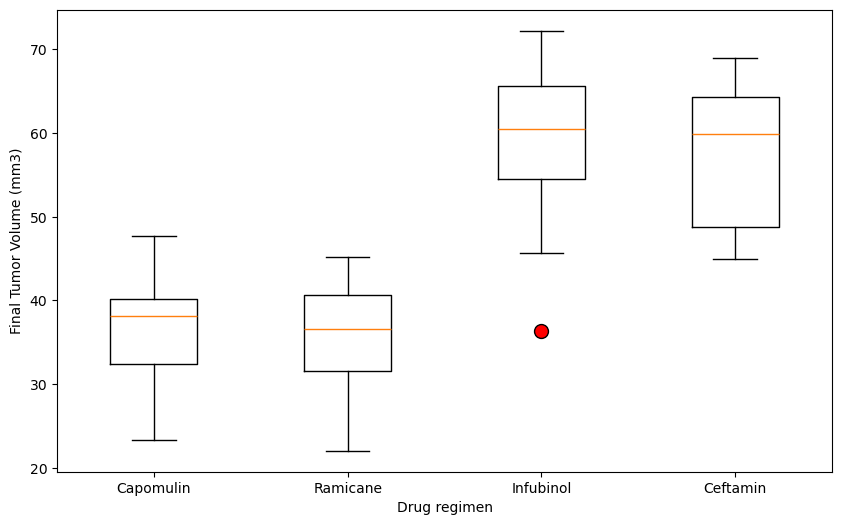

In [26]:
#plot box and whisker graph
#infubinol outlier
infubinol_outlier = 36.321346

#create figure size for box plot
plt.figure(figsize=(10,6))
plt.boxplot(t_volumes, labels=potential_outliers.keys(), showfliers=True)

#plot outlier for Infubinol
plt.scatter(3, infubinol_outlier, color='red', label='Infubinol Outlier', s=100, edgecolor='black')

plt.xlabel('Drug regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

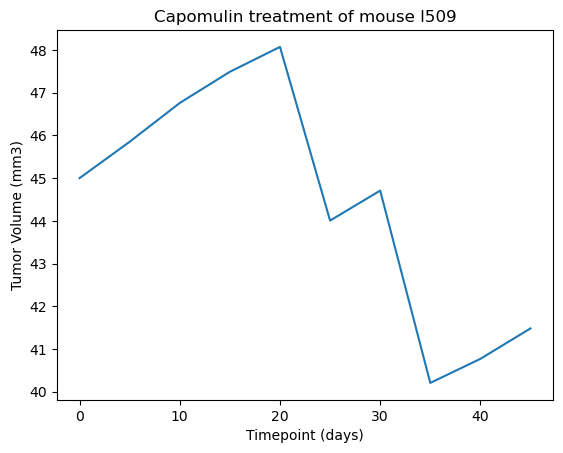

In [47]:
#Filter for capomulin
capomulin = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']

#Select Mouse Id
mouse_id = 'l509'

#filter for selected mouse 
mouse_selection = capomulin[capomulin['Mouse ID'] == mouse_id]
mouse_selection

#plot 
#plt.figure(figsize=(10,6))
plt.plot(mouse_selection['Timepoint'], mouse_selection['Tumor Volume (mm3)'])
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin treatment of mouse l509');

In [28]:
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [29]:
#Get mouse data filtered by Capomulin
#capomulin = clean_mouse_df[clean_mouse_df['Drug Regimen'] == 'Capomulin']

#Get the mouse weight from all mice with capomulin
Mouse_weight = capomulin.drop_duplicates (subset='Mouse ID')[['Mouse ID', 'Weight (g)']].set_index('Mouse ID')



#Get avg mouse tumor volume
Avg_Tumor_size = capomulin.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


Tumor_weight_size = pd.merge(Avg_Tumor_size, Mouse_weight, on ='Mouse ID')

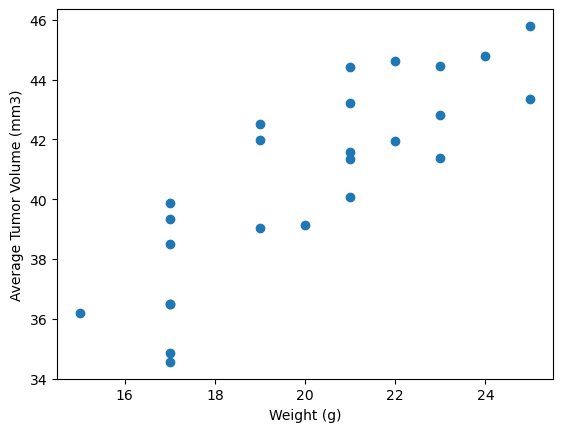

In [30]:
#plot 
#plt.figure(figsize=(10,6))
plt.scatter(Tumor_weight_size['Weight (g)'], Tumor_weight_size['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)');


## Correlation and Regression

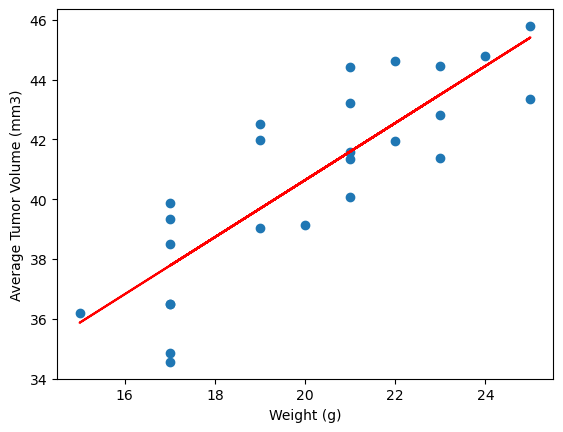

In [40]:
#import lineregress
from scipy.stats import linregress

#Locate data frame with columns 'Mouse Weight', 'Tumor Volume (mm3)', and 'Drug Regimen'
capomulin_grouped = capomulin.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})
capomulin_grouped


correlation = capomulin_grouped['Weight (g)'].corr(capomulin_grouped['Tumor Volume (mm3)'])
#print(f"Correlation Coefficient: {correlation}")

#obtain linear regression values
slope, intercept, r_value, p_value, std_err = linregress(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'])

#plot scatter
plt.scatter(capomulin_grouped['Weight (g)'], capomulin_grouped['Tumor Volume (mm3)'], label='Data Points')

#plot linear regression linregression line 
plt.plot(capomulin_grouped['Weight (g)'], slope * capomulin_grouped['Weight (g)'] + intercept, color='red', label='Linear Regression')

#plot labels 
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)');